In [37]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [38]:
# 데이터셋 인스턴스 생성

df = pd.read_csv(r"C:\ai_class\week7\BP_data.csv")  # CSV 파일 경로
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [39]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [40]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [41]:
df["Genetic_Pedigree_Coefficient"] = df["Genetic_Pedigree_Coefficient"].fillna(0)
df["Pregnancy"] = df["Pregnancy"].fillna(0)
df["alcohol_consumption_per_day"] = df["alcohol_consumption_per_day"].fillna(df["alcohol_consumption_per_day"].mean())
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

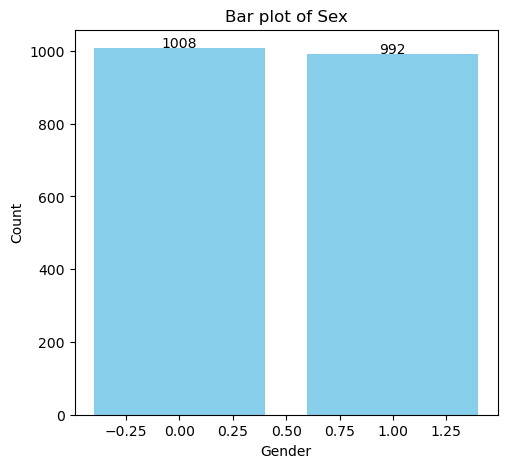

In [42]:
# 데이터프레임 df의 'Sex' 컬럼 값별 빈도 수를 계산하여 Series로 저장
gender_counts = df['Sex'].value_counts()

# 전체 Figure(도화지)의 크기를 가로 12인치, 세로 5인치로 설정
plt.figure(figsize=(12, 5))

# 1행 2열의 서브플롯 중 첫 번째 위치를 선택
plt.subplot(1, 2, 1)

# x축에는 성별 인덱스, y축에는 빈도 값을 사용하여 막대 그래프를 그림
# color='skyblue'로 막대 색상을 스카이블루로 지정
plt.bar(gender_counts.index, gender_counts.values, color='skyblue')

# 그래프의 제목을 'Bar plot of Sex'로 설정
plt.title('Bar plot of Sex')

# x축 레이블을 'Gender'로 설정
plt.xlabel('Gender')

# y축 레이블을 'Count'로 설정
plt.ylabel('Count')

# 각 막대 위에 빈도 수를 텍스트로 표시
# enumerate로 (인덱스, 빈도) 쌍을 얻고, 막대 높이(count) 보다 1만큼 위에 글자를 그리며 중앙 정렬
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 1, str(count), ha='center')


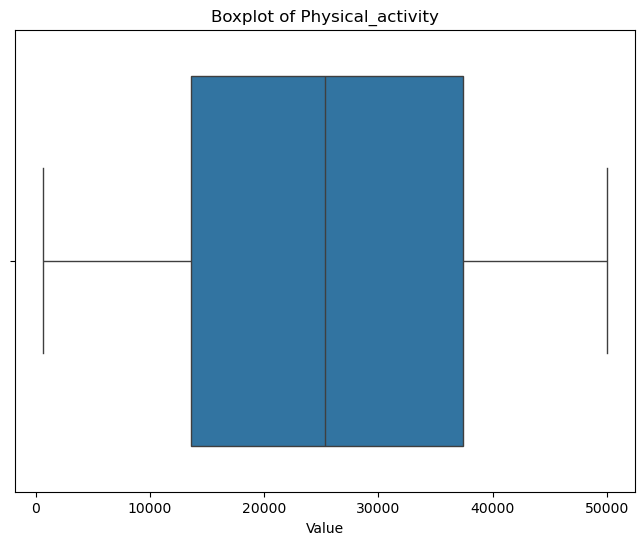

In [43]:
# seaborn 라이브러리를 sns라는 별칭으로 불러오기
import seaborn as sns

# 전체 Figure 크기를 가로 8인치, 세로 6인치로 설정
plt.figure(figsize=(8, 6))

# df의 'Physical_activity' 컬럼 값을 이용해 상자 그림(Boxplot) 생성
sns.boxplot(x=df['Physical_activity'])

# 그래프의 제목을 'Boxplot of Physical_activity'로 설정
plt.title('Boxplot of Physical_activity')

# x축 레이블을 'Value'로 설정
plt.xlabel('Value')

# 생성된 그래프를 화면에 표시
plt.show()


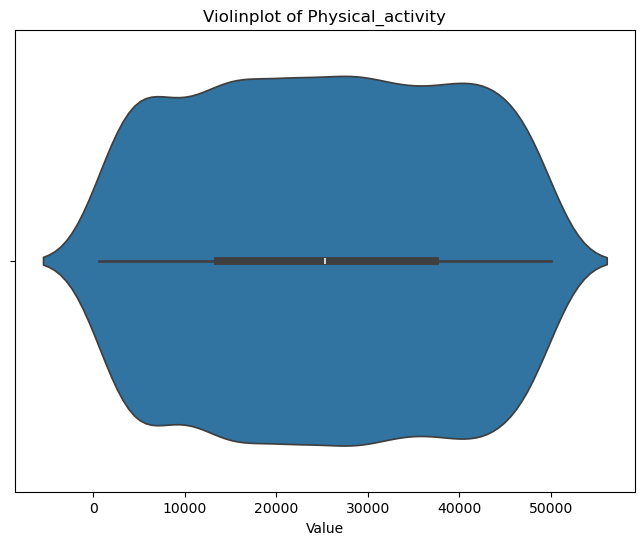

In [44]:
# matplotlib의 pyplot 모듈을 plt라는 별칭으로 불러오기
import matplotlib.pyplot as plt
# seaborn 라이브러리를 sns라는 별칭으로 불러오기
import seaborn as sns

# 전체 Figure(도화지)의 크기를 가로 8인치, 세로 6인치로 설정
plt.figure(figsize=(8, 6))

# df의 'Physical_activity' 컬럼 값을 이용해 바이올린 플롯(Violinplot) 생성
# x축에 'Physical_activity' 값 분포를 나타내고, 내부 밀도 형태를 시각화
sns.violinplot(x=df['Physical_activity'])

# 그래프의 제목을 'Violinplot of Physical_activity'로 설정
plt.title('Violinplot of Physical_activity')

# x축 레이블을 'Value'로 설정
plt.xlabel('Value')

# 생성된 그래프를 화면에 표시
plt.show()


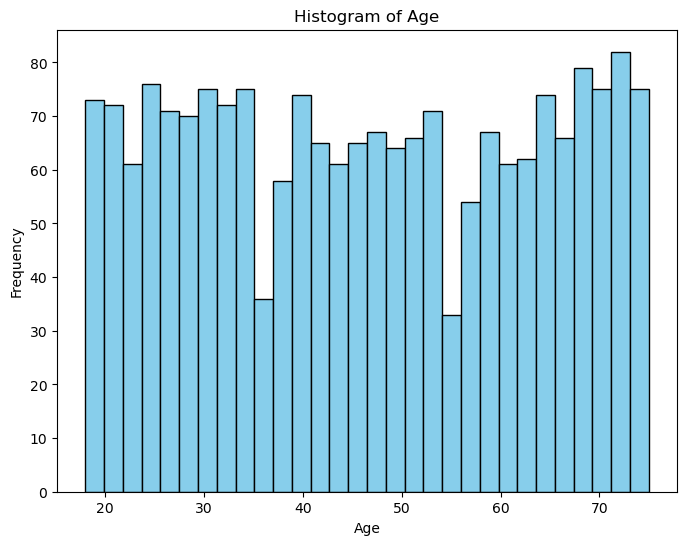

In [45]:
# df의 'Age' 컬럼 값의 분포를 히스토그램으로 그리기
plt.figure(figsize=(8, 6))                                    # 도화지 크기를 가로 8인치, 세로 6인치로 설정
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')  # 'Age' 데이터를 30개의 구간으로 나누어 히스토그램을 그리고, 막대 내부를 스카이블루, 테두리를 검은색으로 설정
plt.title('Histogram of Age')                                 # 그래프의 제목을 'Histogram of Age'로 설정
plt.xlabel('Age')                                             # x축 레이블을 'Age'로 설정
plt.ylabel('Frequency')                                       # y축 레이블을 'Frequency'로 설정
plt.show()                                                    # 생성된 히스토그램을 화면에 표시


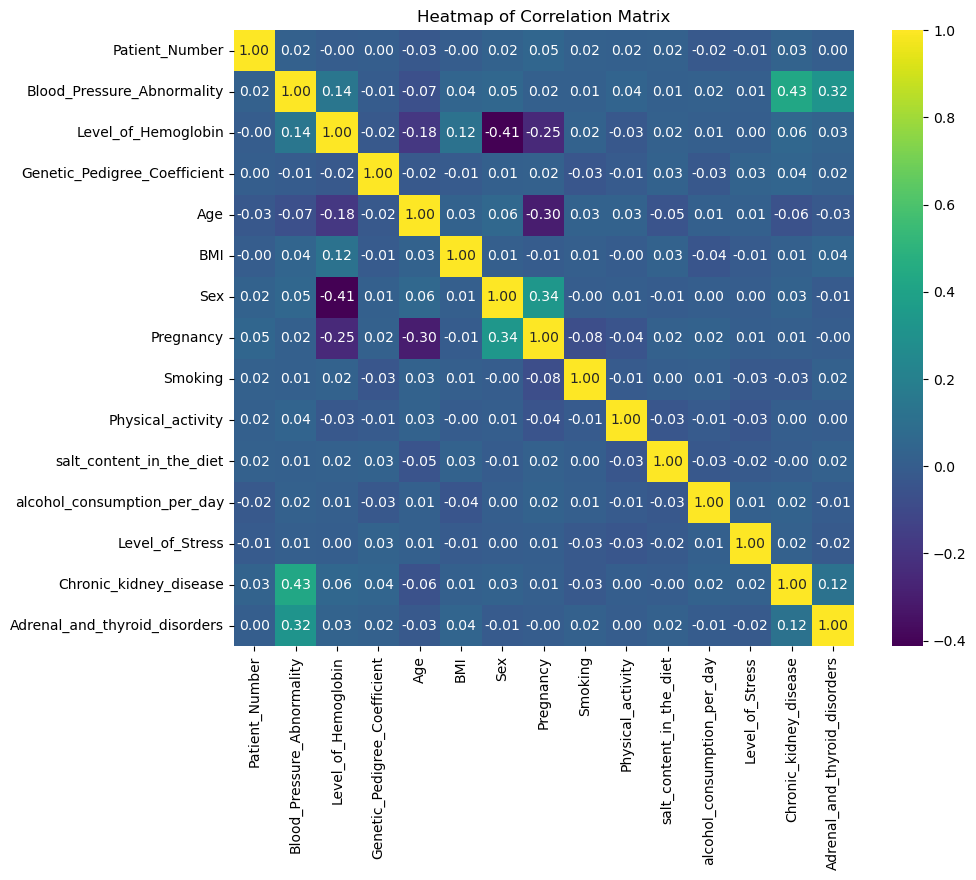

In [46]:
# DataFrame df의 모든 수치형 컬럼 간 상관계수를 계산하여 corr_matrix에 저장
corr_matrix = df.corr()

# 전체 Figure 크기를 가로 10인치, 세로 8인치로 설정
plt.figure(figsize=(10, 8))

# seaborn의 heatmap 함수로 상관계수 행렬 시각화
# annot=True로 각 셀에 상관계수 값 표시, cmap='viridis'로 컬러맵 설정, fmt=".2f"로 소수점 둘째 자리까지 포맷 지정
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")

# 그래프의 제목을 'Heatmap of Correlation Matrix'로 설정
plt.title('Heatmap of Correlation Matrix')

# 생성된 heatmap을 화면에 표시
plt.show()


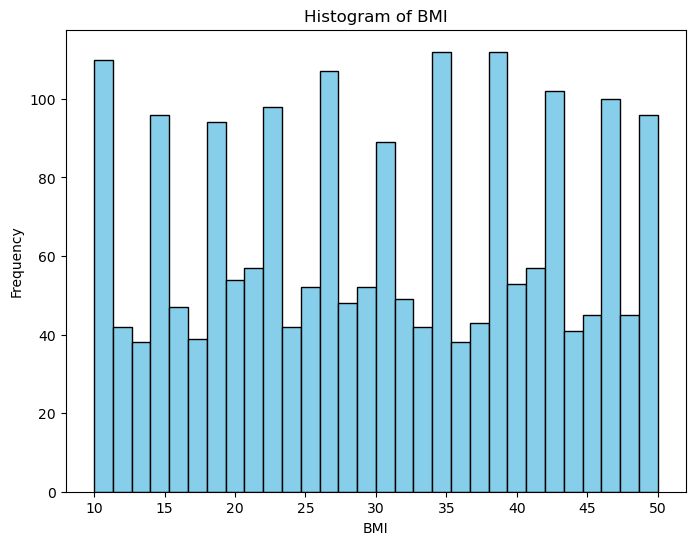

In [47]:
# df의 'BMI' 컬럼 값의 분포를 히스토그램으로 그리기
plt.figure(figsize=(8, 6))                                    # 도화지 크기를 가로 8인치, 세로 6인치로 설정
plt.hist(df['BMI'], bins=30, color='skyblue', edgecolor='black')  # 'BMI' 데이터를 30개의 구간으로 나누어 히스토그램을 그리고, 막대 색상을 스카이블루, 테두리를 검은색으로 설정
plt.title('Histogram of BMI')                                 # 그래프 제목을 'Histogram of BMI'로 설정
plt.xlabel('BMI')                                             # x축 레이블을 'BMI'로 설정
plt.ylabel('Frequency')                                       # y축 레이블을 'Frequency'로 설정
plt.show()                                                    # 생성된 히스토그램을 화면에 표시


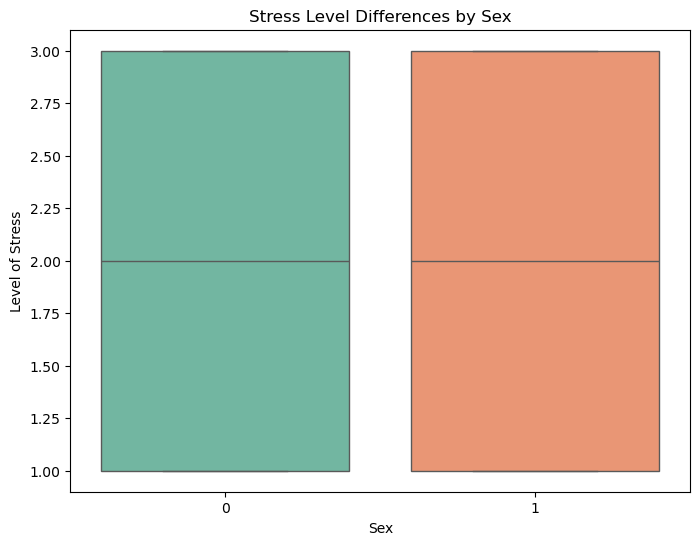

In [48]:
# 전체 Figure(도화지)의 크기를 가로 8인치, 세로 6인치로 설정
plt.figure(figsize=(8, 6))

# df 데이터프레임에서 'Sex'별로 'Level_of_Stress' 분포를 박스플롯으로 그림
# x='Sex'와 hue='Sex'로 성별에 따라 색을 다르게 지정하되, dodge=False로 박스 간 간격을 겹치게 설정
# palette='Set2'로 색상 팔레트를 지정, legend=False로 범례를 표시하지 않음
sns.boxplot(x='Sex', y='Level_of_Stress', data=df, hue='Sex', palette='Set2', dodge=False, legend=False)

# 그래프의 제목을 'Stress Level Differences by Sex'로 설정
plt.title('Stress Level Differences by Sex')

# x축 레이블을 'Sex'로 설정
plt.xlabel('Sex')

# y축 레이블을 'Level of Stress'로 설정
plt.ylabel('Level of Stress')

# 생성된 박스플롯을 화면에 표시
plt.show()


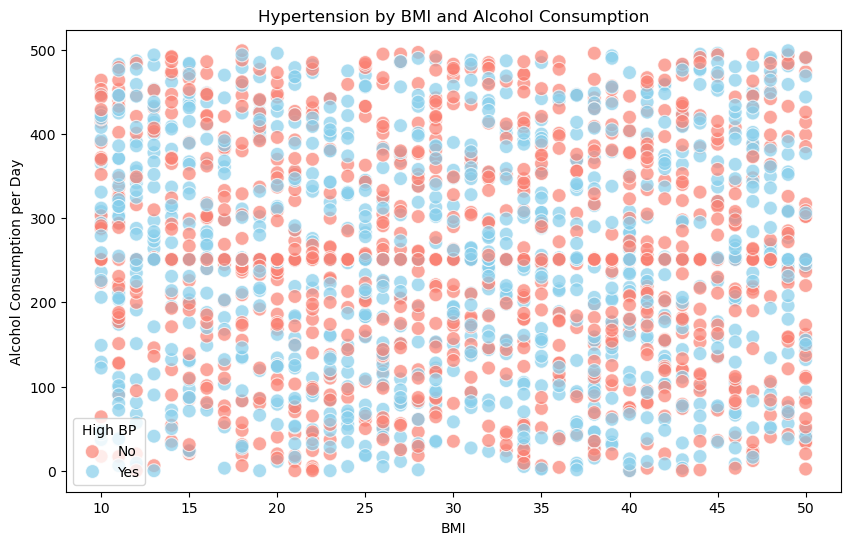

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='BMI',
    y='alcohol_consumption_per_day',
    hue='Blood_Pressure_Abnormality',
    data=df,
    palette={0: 'skyblue', 1: 'salmon'},
    s=100,
    alpha=0.7
)
plt.title('Hypertension by BMI and Alcohol Consumption')
plt.xlabel('BMI')
plt.ylabel('Alcohol Consumption per Day')
plt.legend(title='High BP', labels=['No', 'Yes'])
plt.show()


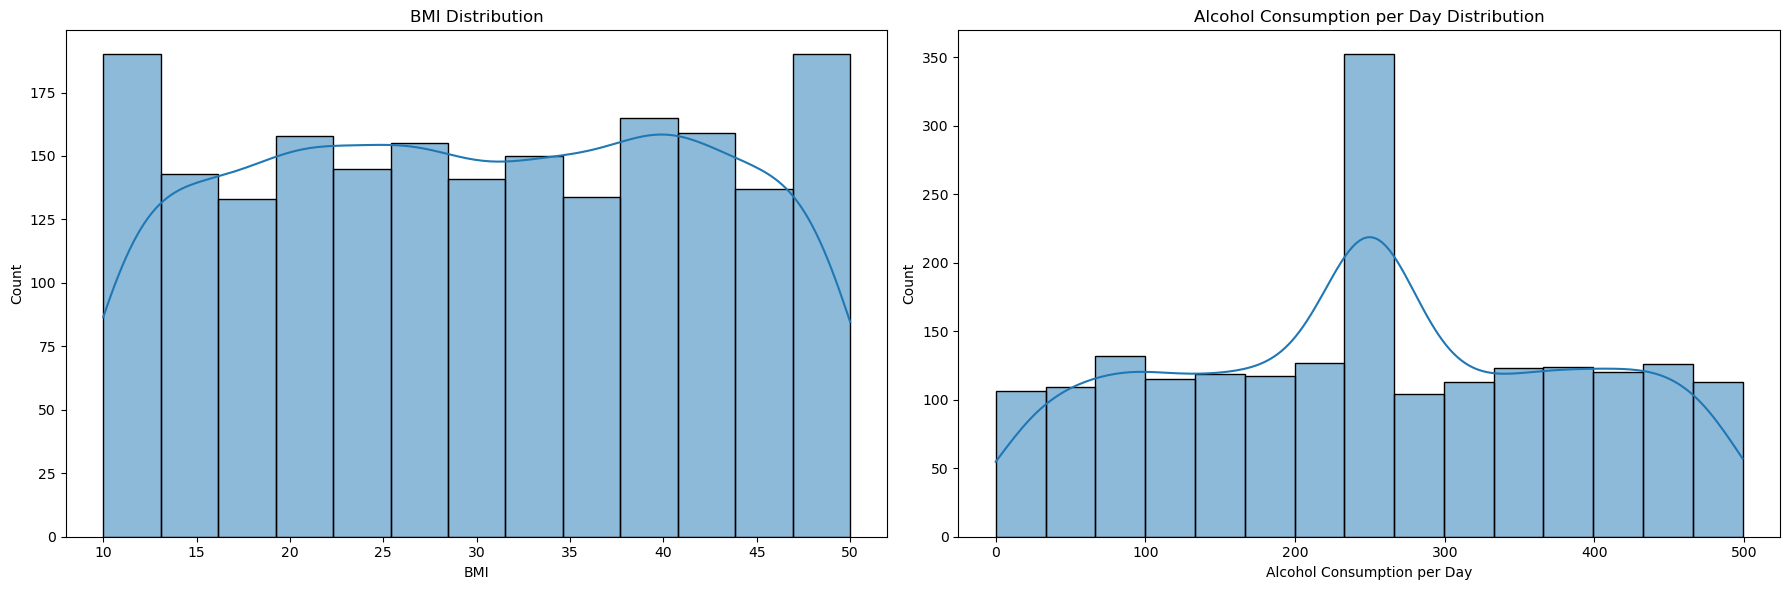

In [50]:
# 히스토그램을 그리기 위한 Figure와 서브플롯 설정
plt.figure(figsize=(18, 6))  # 전체 크기 가로 18인치, 세로 6인치

# 1행 2열 중 첫 번째 서브플롯: BMI 분포
ax1 = plt.subplot(1, 2, 1)  
sns.histplot(
    df['BMI'].dropna(),  # 결측치 제거한 BMI 컬럼
    kde=True,            # 커널 밀도 추정선 표시
    stat='count',        # y축을 빈도(count)로
    ax=ax1
)
ax1.set_title('BMI Distribution')         # 서브플롯 제목
ax1.set_xlabel('BMI')                     # x축 레이블
ax1.set_ylabel('Count')                   # y축 레이블

# 1행 2열 중 두 번째 서브플롯: 일일 알코올 섭취량 분포
ax2 = plt.subplot(1, 2, 2)
sns.histplot(
    df['alcohol_consumption_per_day'].dropna(),  # 결측치 제거한 알코올 섭취량 컬럼
    kde=True,                                    # 커널 밀도 추정선 표시
    stat='count',                                # y축을 빈도(count)로
    ax=ax2
)
ax2.set_title('Alcohol Consumption per Day Distribution')  # 서브플롯 제목
ax2.set_xlabel('Alcohol Consumption per Day')              # x축 레이블
ax2.set_ylabel('Count')                                    # y축 레이블

plt.tight_layout()  # 서브플롯 간 간격 자동 조정
plt.show()         # 그래프 출력

C:\Users\이민규\AppData\Local\Temp\ipykernel_2444\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


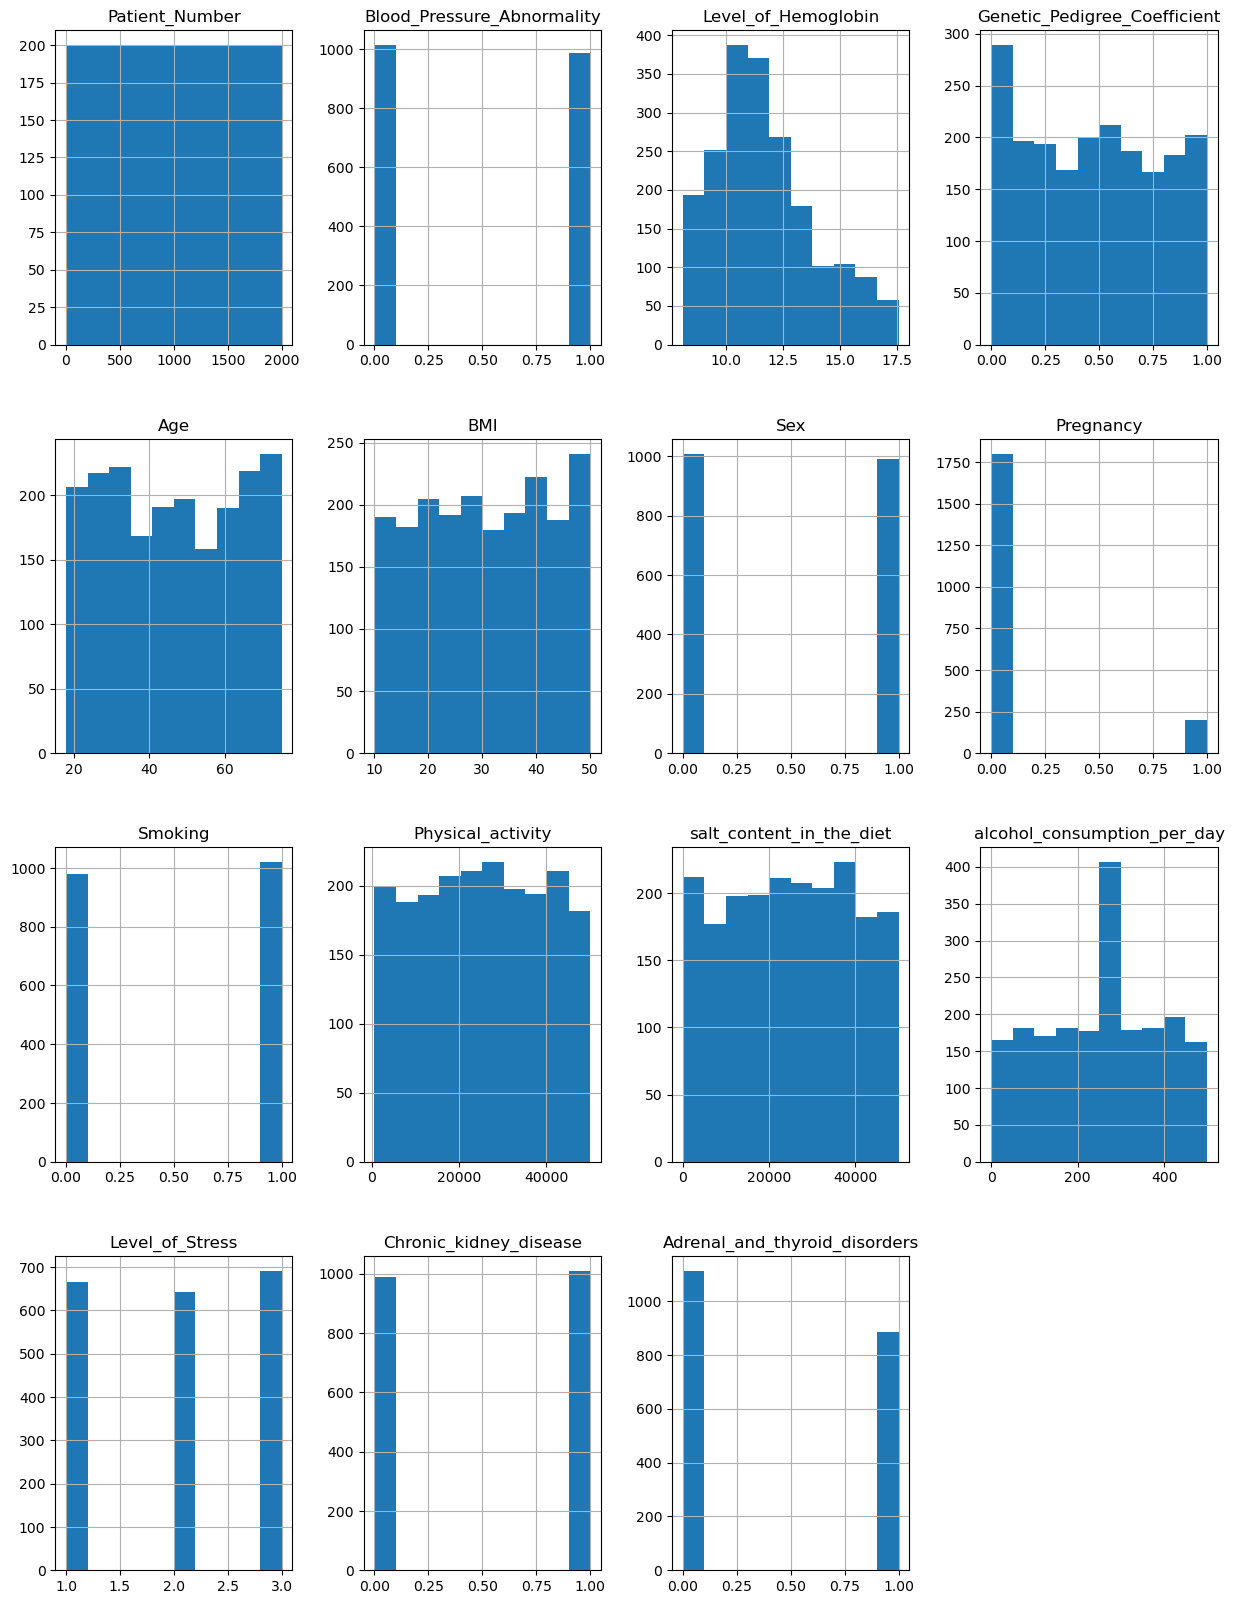

In [51]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

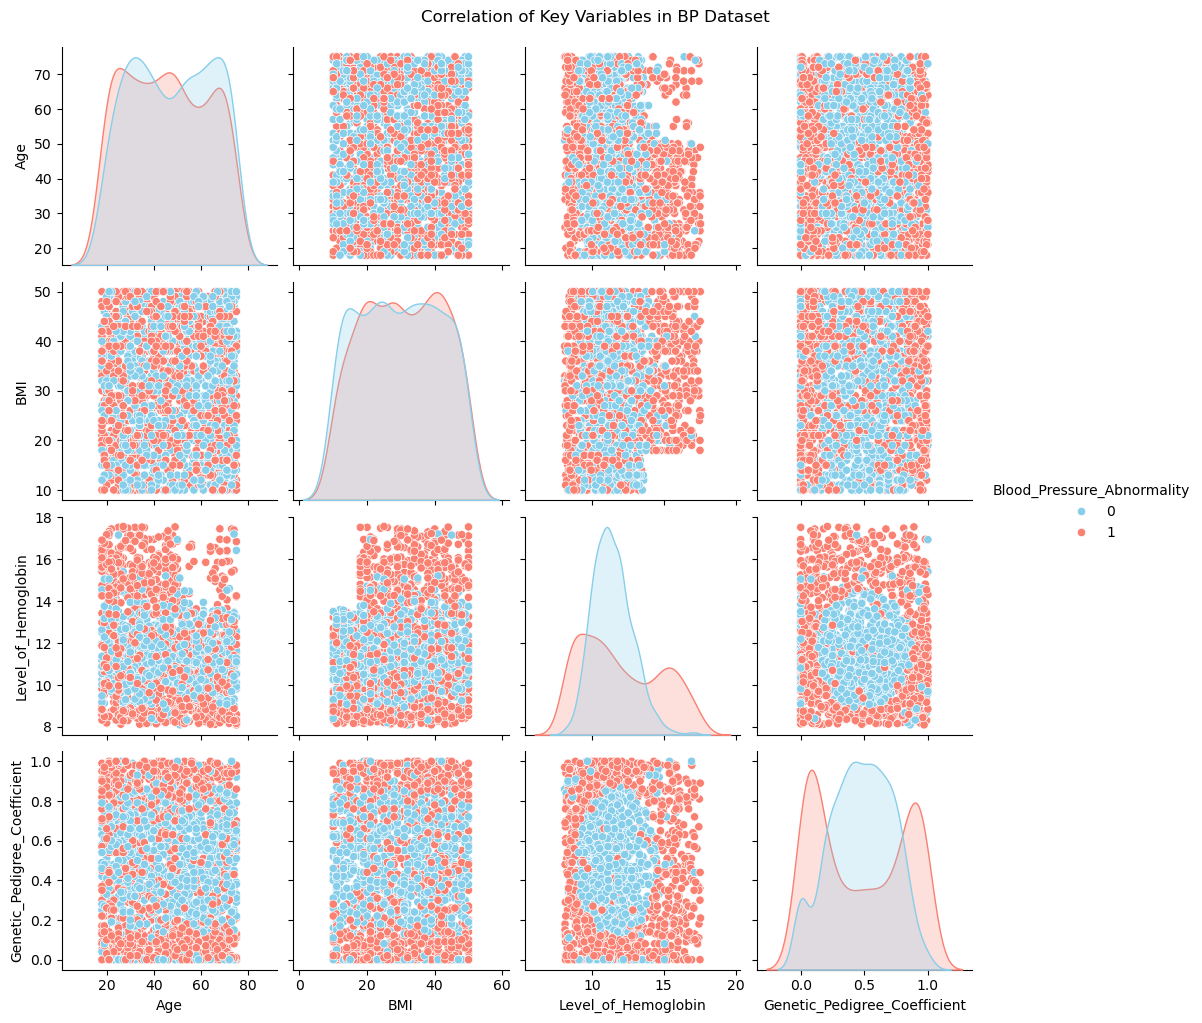

In [52]:
# 상관관계를 보고 싶은 칼럼 4개를 선택해서 pairplot 그리기
sns.pairplot(
    df,
    vars=[
        'Age',                         # 나이
        'BMI',                         # 체질량지수
        'Level_of_Hemoglobin',         # 혈색소 수치
        'Genetic_Pedigree_Coefficient' # 유전력 계수
    ],
    hue='Blood_Pressure_Abnormality',  # 고혈압 여부에 따라 색상 구분
    palette={0: 'skyblue', 1: 'salmon'},  # 0은 skyblue, 1은 salmon
    diag_kind='kde'                     # 대각선 히스토그램 대신 KDE 곡선 표시
)

plt.suptitle('Correlation of Key Variables in BP Dataset', y=1.02)  # 전체 제목 위치 조정
plt.show()

In [53]:
# 데이터와 타겟 분리
X = df.drop('Blood_Pressure_Abnormality', axis=1)
y = df['Blood_Pressure_Abnormality']

In [54]:
X.head()

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,2,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,3,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,4,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,5,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0


In [55]:
Y = pd.get_dummies(y).values
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [False,  True],
       [ True, False],
       [False,  True]])

In [56]:
X = X.values
X

array([[1.000e+00, 1.128e+01, 9.000e-01, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+00, 9.750e+00, 2.300e-01, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 1.079e+01, 9.100e-01, ..., 2.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.998e+03, 1.691e+01, 2.200e-01, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [1.999e+03, 1.115e+01, 7.200e-01, ..., 3.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+03, 1.136e+01, 9.000e-02, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [57]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/0.85, random_state=42)

In [58]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((1400, 14), (300, 14), (300, 14), (1400, 2), (300, 2), (300, 2))

In [59]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [60]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

val_dataset = TensorDataset(X_test, y_test)
val_dataloader  = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [61]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

(torch.Size([1400, 14]),
 torch.Size([300, 14]),
 torch.Size([300, 14]),
 torch.Size([1400, 2]),
 torch.Size([300, 2]),
 torch.Size([300, 2]))

In [62]:
class BPDense(nn.Module):
    def __init__(self):
        super(BPDense, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the model, loss function, and optimizer
model = BPDense()

In [63]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [64]:
# Variables to store loss and accuracy
train_losses = []
val_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            # labels가 원-핫 인코딩되어 [32, 2]의 shape라면, argmax로 [32]의 클래스 인덱스로 변환
            labels_idx = labels.argmax(dim=1)
            total += labels.size(0)
            correct += (predicted == labels_idx).sum().item()

    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6857, Accuracy: 66.67%
Epoch 2/20, Loss: 0.5904, Accuracy: 74.33%
Epoch 3/20, Loss: 0.5222, Accuracy: 74.67%
Epoch 4/20, Loss: 0.4885, Accuracy: 76.67%
Epoch 5/20, Loss: 0.4595, Accuracy: 78.67%
Epoch 6/20, Loss: 0.4237, Accuracy: 77.00%
Epoch 7/20, Loss: 0.3952, Accuracy: 79.00%
Epoch 8/20, Loss: 0.3598, Accuracy: 78.67%
Epoch 9/20, Loss: 0.3377, Accuracy: 80.33%
Epoch 10/20, Loss: 0.3259, Accuracy: 78.67%
Epoch 11/20, Loss: 0.3019, Accuracy: 80.33%
Epoch 12/20, Loss: 0.2844, Accuracy: 81.33%
Epoch 13/20, Loss: 0.2824, Accuracy: 81.67%
Epoch 14/20, Loss: 0.2761, Accuracy: 81.00%
Epoch 15/20, Loss: 0.2563, Accuracy: 83.00%
Epoch 16/20, Loss: 0.2421, Accuracy: 79.33%
Epoch 17/20, Loss: 0.2378, Accuracy: 80.67%
Epoch 18/20, Loss: 0.2237, Accuracy: 81.33%
Epoch 19/20, Loss: 0.2055, Accuracy: 82.00%
Epoch 20/20, Loss: 0.2005, Accuracy: 82.00%
Training complete.


In [65]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        # 만약 labels가 원-핫 인코딩 형태라면, 클래스 인덱스로 변환 (예: [batch_size, num_classes] -> [batch_size])
        if labels.dim() > 1 and labels.shape[1] > 1:
            labels = labels.argmax(dim=1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[136  29]
 [ 25 110]]
F1 Score: 0.82
Precision: 0.82
Recall: 0.82
Specificity: 0.82
